#  **Hands-on-session1 (Querying data from materials databases)**

# **Necessary Libraries**

In [1]:
!pip install matminer[citrine]
!pip install pyyaml
!pip install mp_api
!pip install pandas==2.2.2
!git clone https://github.com/RealBack1/practice.git

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.9/54.9 kB 2.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.6/55.6 kB 4.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 51.9/51.9 kB 4.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.1/5.1 MB 62.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 78.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 96.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 331.1/331.1 kB 28.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 332.3/332.3 kB 26.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 119.7/119.7 kB 11.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 809.1/809.1 kB 52.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.1/60.1 kB 4.9 MB/s eta 0:00:00
   ━━━

# **Practice**

**Getting Data**

*Revised from Joseph Montoya's notebook*

This notebook demonstrates a few basic examples from matminer's data retrieval features. Matminer supports data retrieval from the following sources.

*   Materials Project (https://materialsproject.org/)

This notebook was last updated 11/15/18 for version 0.4.5 of matminer.

Each resource has a corresponding object in matminer designed for retrieving data and preprocessing it into a pandas dataframe. In addition, matminer can also access and aggregate data from your own mongo database, if you have one.


**Data retrieval**

The materials project data retrieval tool, matminer.data_retrieval.retrieve_MP.MPDataRetrieval is initialized using an api_key that can be found on your personal dashboard page on materialsproject.org if you've created an account. If you've set your api key via pymatgen (e.g. pmg config --add PMG_MAPI_KEY YOUR_API_KEY_HERE), the data retrieval tool may be initialized without an input argument.

**We need our own MP API Key**

In [2]:
## Materials Project API client: https://docs.materialsproject.org/downloading-data/using-the-api/getting-started
## Loading module of MP API client
from mp_api.client import MPRester
import pandas as pd

In [3]:
## Put your own API key
my_api_key = "CiInKG9AGVmp2w8U1vDl9U2KI4hK9dDF"
mpr = MPRester(my_api_key)

In [4]:
list_of_available_fields = mpr.materials.summary.available_fields
print(list_of_available_fields)

['builder_meta', 'nsites', 'elements', 'nelements', 'composition', 'composition_reduced', 'formula_pretty', 'formula_anonymous', 'chemsys', 'volume', 'density', 'density_atomic', 'symmetry', 'property_name', 'material_id', 'deprecated', 'deprecation_reasons', 'last_updated', 'origins', 'warnings', 'structure', 'task_ids', 'uncorrected_energy_per_atom', 'energy_per_atom', 'formation_energy_per_atom', 'energy_above_hull', 'is_stable', 'equilibrium_reaction_energy_per_atom', 'decomposes_to', 'xas', 'grain_boundaries', 'band_gap', 'cbm', 'vbm', 'efermi', 'is_gap_direct', 'is_metal', 'es_source_calc_id', 'bandstructure', 'dos', 'dos_energy_up', 'dos_energy_down', 'is_magnetic', 'ordering', 'total_magnetization', 'total_magnetization_normalized_vol', 'total_magnetization_normalized_formula_units', 'num_magnetic_sites', 'num_unique_magnetic_sites', 'types_of_magnetic_species', 'bulk_modulus', 'shear_modulus', 'universal_anisotropy', 'homogeneous_poisson', 'e_total', 'e_ionic', 'e_electronic',

**Practice 1: Get various properties of binary oxide materials with "AO" formula**

In [5]:
docs = mpr.materials.summary.search(chemsys="*-O", formula="AB", fields=list_of_available_fields)
results = [doc.dict() for doc in docs]
df_full = pd.DataFrame(results)
#df_full = pd.read_excel("/content/practice/Class/data/Hands_on_session1_data.xlsx", sheet_name="practice_1")
df = df_full.loc[:, ["formula_pretty", "material_id", "formation_energy_per_atom", "energy_above_hull", "band_gap"]]
sdf = df.sort_values(by="formation_energy_per_atom", axis=0)
sdf.head(10)

Retrieving SummaryDoc documents:   0%|          | 0/241 [00:00<?, ?it/s]

,formula_pretty,material_id,formation_energy_per_atom,energy_above_hull,band_gap
181,CaO,mp-2605,-3.306019,0.000000,3.6301
186,ScO,mp-644481,-3.240490,0.066787,0.0000
159,CeO,mp-10688,-3.232231,0.000000,0.0000
164,LaO,mp-1206710,-3.204330,0.025611,0.0000
129,CaO,mp-545512,-3.201695,0.104324,3.1200
123,ErO,mp-1184211,-3.127546,0.253365,0.0000
178,EuO,mp-21394,-3.123423,0.000000,0.0000
135,HoO,mp-974336,-3.116774,0.239526,0.0000
169,SmO,mp-1611,-3.107168,0.111126,0.0000
103,BeO,mp-2542,-3.102856,0.000000,7.4639


**Practice 2: Draw the phase diagram for Li-Ni-O**

(This code was written with reference to the Jupyter notebook by Materials Virtual Lab(https://matgenb.materialsvirtuallab.org/))

Retrieving ThermoDoc documents:   0%|          | 0/457 [00:00<?, ?it/s]

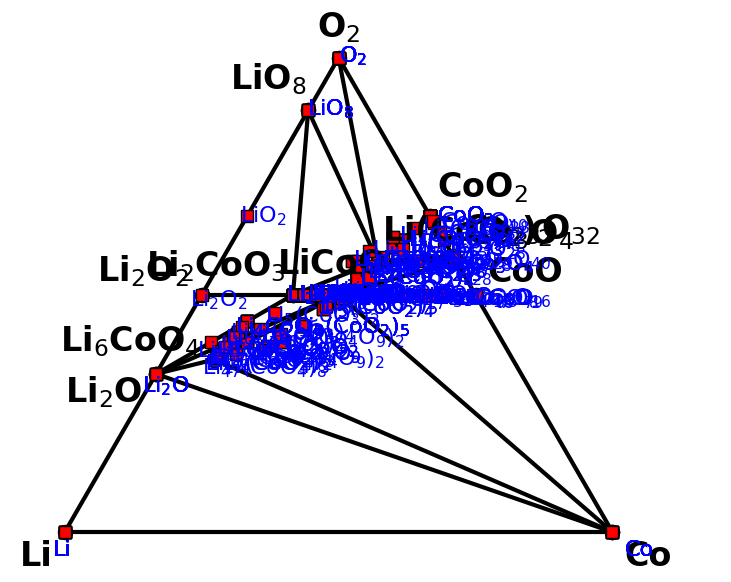

In [6]:
from pymatgen.analysis.phase_diagram import PhaseDiagram, PDPlotter
entries = mpr.get_entries_in_chemsys(elements=["Li", "Co", "O"], additional_criteria={"thermo_types": ["GGA_GGA+U"]})
phase = PhaseDiagram(entries)
plotter = PDPlotter(phase, backend="matplotlib")
plotter.show()

**Practice 3: Among the Li–X–O compounds, identify those with the R-3m crystal structure, and classify the stable ones (with energy_above_hull = 0)**

In [7]:
pd.set_option("display.max_rows", None)   # None → 제한 없음
pd.set_option("display.max_columns", None)

docs = mpr.materials.summary.search(chemsys="Li-*-O", num_elements=3, spacegroup_symbol="R-3m", fields=list_of_available_fields)
results = [doc.dict() for doc in docs]
df_full = pd.DataFrame(results)
#df_full = pd.read_excel("/content/practice/Class/data/Hands_on_session1_data.xlsx", sheet_name="practice_3")
df = df_full.loc[:, ["formula_pretty", "material_id", "energy_above_hull","band_gap", "symmetry"]]
df.head(10)

Retrieving SummaryDoc documents:   0%|          | 0/62 [00:00<?, ?it/s]

,formula_pretty,material_id,energy_above_hull,band_gap,symmetry
0,LiNO3,mp-1094130,2.160650,0.0000,"{'crystal_system': 'Trigonal', 'symbol': 'R-3m..."
1,LiHoO2,mp-1176669,0.080561,0.0001,"{'crystal_system': 'Trigonal', 'symbol': 'R-3m..."
2,LiCoO2,mp-1404711,0.045590,1.9960,"{'crystal_system': 'Trigonal', 'symbol': 'R-3m..."
3,LiRhO2,mp-14115,0.000000,1.5153,"{'crystal_system': 'Trigonal', 'symbol': 'R-3m..."
4,LiCrO2,mp-18793,0.000000,3.1156,"{'crystal_system': 'Trigonal', 'symbol': 'R-3m..."


In [8]:
df

,formula_pretty,material_id,energy_above_hull,band_gap,symmetry
0,LiNO3,mp-1094130,2.160650,0.0000,"{'crystal_system': 'Trigonal', 'symbol': 'R-3m..."
1,LiHoO2,mp-1176669,0.080561,0.0001,"{'crystal_system': 'Trigonal', 'symbol': 'R-3m..."
2,LiCoO2,mp-1404711,0.045590,1.9960,"{'crystal_system': 'Trigonal', 'symbol': 'R-3m..."
3,LiRhO2,mp-14115,0.000000,1.5153,"{'crystal_system': 'Trigonal', 'symbol': 'R-3m..."
4,LiCrO2,mp-18793,0.000000,3.1156,"{'crystal_system': 'Trigonal', 'symbol': 'R-3m..."
5,LiMoO2,mp-19338,0.032507,0.0000,"{'crystal_system': 'Trigonal', 'symbol': 'R-3m..."
6,LiVO2,mp-19340,0.000000,0.0000,"{'crystal_system': 'Trigonal', 'symbol': 'R-3m..."
7,LiFeO2,mp-19419,0.074873,1.6720,"{'crystal_system': 'Trigonal', 'symbol': 'R-3m..."
8,LiCoO2,mp-22526,0.000000,0.6623,"{'crystal_system': 'Trigonal', 'symbol': 'R-3m..."
9,LiCuO2,mp-25372,0.067988,0.0000,"{'crystal_system': 'Trigonal', 'symbol': 'R-3m..."


In [12]:
df_zero = df[df["energy_above_hull"] == 0]
df_zero.head(10)

,formula_pretty,material_id,energy_above_hull,band_gap,symmetry
0,LiNiO2,mp-2348641,0.0,0.0180,"{'crystal_system': 'Triclinic', 'symbol': 'P1'..."
1,LiMnO2,mp-754656,0.0,1.1504,"{'crystal_system': 'Monoclinic', 'symbol': 'C2..."
2,LiCuO2,mp-9158,0.0,0.3163,"{'crystal_system': 'Monoclinic', 'symbol': 'C2..."
3,LiBO2,mp-14232,0.0,7.2811,"{'crystal_system': 'Tetragonal', 'symbol': 'I-..."
4,LiErO2,mp-10970,0.0,4.1108,"{'crystal_system': 'Monoclinic', 'symbol': 'P2..."
5,LiTmO2,mp-1176564,0.0,0.0001,"{'crystal_system': 'Monoclinic', 'symbol': 'P2..."
6,LiSbO2,mp-1198780,0.0,3.0684,"{'crystal_system': 'Monoclinic', 'symbol': 'P2..."
7,LiHoO2,mp-12645,0.0,4.3851,"{'crystal_system': 'Monoclinic', 'symbol': 'P2..."
8,LiYO2,mp-7020,0.0,4.3897,"{'crystal_system': 'Monoclinic', 'symbol': 'P2..."
9,LiAgO2,mp-996962,0.0,0.6382,"{'crystal_system': 'Monoclinic', 'symbol': 'P2..."


**Practice 3-2: Among the LiXO2 compounds, obtain the structures of the most stable compounds (with energy_above_hull = 0)**



In [11]:
docs = mpr.materials.summary.search(chemsys="Li-*-O", num_elements=3,formula="ABC2", energy_above_hull=(0,1e-6), fields=list_of_available_fields)
results = [doc.dict() for doc in docs]
df_full = pd.DataFrame(results)
#df_full = pd.read_excel("/content/practice/Class/data/Hands_on_session1_data.xlsx", sheet_name="practice_3-2")
df = df_full.loc[:, ["formula_pretty", "material_id", "energy_above_hull","band_gap", "symmetry"]]
df.head(10)

Retrieving SummaryDoc documents:   0%|          | 0/28 [00:00<?, ?it/s]

,formula_pretty,material_id,energy_above_hull,band_gap,symmetry
0,LiNiO2,mp-2348641,0.0,0.0180,"{'crystal_system': 'Triclinic', 'symbol': 'P1'..."
1,LiMnO2,mp-754656,0.0,1.1504,"{'crystal_system': 'Monoclinic', 'symbol': 'C2..."
2,LiCuO2,mp-9158,0.0,0.3163,"{'crystal_system': 'Monoclinic', 'symbol': 'C2..."
3,LiBO2,mp-14232,0.0,7.2811,"{'crystal_system': 'Tetragonal', 'symbol': 'I-..."
4,LiErO2,mp-10970,0.0,4.1108,"{'crystal_system': 'Monoclinic', 'symbol': 'P2..."
5,LiTmO2,mp-1176564,0.0,0.0001,"{'crystal_system': 'Monoclinic', 'symbol': 'P2..."
6,LiSbO2,mp-1198780,0.0,3.0684,"{'crystal_system': 'Monoclinic', 'symbol': 'P2..."
7,LiHoO2,mp-12645,0.0,4.3851,"{'crystal_system': 'Monoclinic', 'symbol': 'P2..."
8,LiYO2,mp-7020,0.0,4.3897,"{'crystal_system': 'Monoclinic', 'symbol': 'P2..."
9,LiAgO2,mp-996962,0.0,0.6382,"{'crystal_system': 'Monoclinic', 'symbol': 'P2..."
